![SheLovesData](https://shelovesdata.com/wp-content/uploads/2018/06/she-loves-data-wide@2xv2.png)

# Introduction to Python Workshop - Day 2

***
Overview
    1. Library imports
    2. Pandas Series
    3. Pandas DataFrames
    
***

![round2](https://tenor.com/view/lets-go-round2-war-paint-pretty-gif-16173723.gif)

To start our script, we will be importing the libaries in the form of import statements. All the libraries in this demo will come out of the box with the [anaconda](https://docs.anaconda.com/anaconda/packages/py3.7_win-64/) distribution. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import datetime

**Task**:

Run `import pandas as pd` below: 

Now type `pd.` and click `Tab`. You will see a dropdown that shows all the different operations you can do. Remember python is **case-sensitive**.

In [ ]:
pd.

*** 

## Series

A **Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Check Type
We can do many of the same things we did with lists before with a pd.Series(). We can check the **type**:

In [4]:
type(s)

pandas.core.series.Series

### Subsetting
We can pull the first value (don't forget that zero-indexing!)

In [5]:
s[0]

1.0

We can pull a **range of values**:

In [6]:
s[3:5]

3    NaN
4    6.0
dtype: float64

### Operations
Also, we can run many of the same **operations** like we did with lists:
    
#### Arithmetic operators:
<table><thead>
<tr>
<th style="text-align: center">Operator</th>
<th>What it means</th>
</tr>
</thead><tbody>
<tr>
<td style="text-align: center">+</td>
<td>Addition</td>
</tr>
<tr>
<td style="text-align: center">-</td>
<td>Subtraction</td>
</tr>
<tr>
<td style="text-align: center">*</td>
<td>Multiplication</td>
</tr>
<tr>
<td style="text-align: center">/</td>
<td>Division</td>
</tr>
<tr>
<td style="text-align: center">**</td>
<td>Exponentiation</td>
</tr>
<tr>
</tbody></table>

In [7]:
s + s

0     2.0
1     6.0
2    10.0
3     NaN
4    12.0
5    16.0
dtype: float64

In [8]:
s * 2

0     2.0
1     6.0
2    10.0
3     NaN
4    12.0
5    16.0
dtype: float64

In [9]:
np.exp(s)

0       2.718282
1      20.085537
2     148.413159
3            NaN
4     403.428793
5    2980.957987
dtype: float64

### Indexing

An additional component of a Series is the **index**, which can represent anything you'd like

In [10]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [11]:
s.rename({0:'date', 1:'apple', 2:'orange', 3:'mango' , 4:'pear' , 5:'cucumber' }, inplace=True)

In [12]:
s

date        1.0
apple       3.0
orange      5.0
mango       NaN
pear        6.0
cucumber    8.0
dtype: float64

I can now subset on this new index.

In [13]:
s['date']

1.0

I can also pull out more than than one element from the Series. Notice the syntax has two brackets! If you don't include two brackets, you will get an error.

In [14]:
s[['date', 'apple']] 

date     1.0
apple    3.0
dtype: float64

We can also subset based on a condition. Let's say we wanted to pull all the fruits and veggies that I have very few of: 

In [15]:
s[s<5]

date     1.0
apple    3.0
dtype: float64

I can also **name** the series. You'll notice at the bottom of the printed Series, a new label appeared `Name: counts`

In [16]:
s = s.rename("counts")
s

date        1.0
apple       3.0
orange      5.0
mango       NaN
pear        6.0
cucumber    8.0
Name: counts, dtype: float64

**Task**: 
1. Take a look at [this](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro) documentaion and make your own series. 
2. Check the type 
3. Print the 3rd element
4. Apply an operation of your choice to the Series
5. Change the index to colors
6. Subset the Series

In [17]:
t1 = pd.Series(np.random.randn(5))
t1

0   -1.070821
1    0.709729
2    0.035493
3   -0.727697
4    1.259029
dtype: float64

In [18]:
t2 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
t2

a   -1.167966
b   -0.376874
c    2.546369
d   -1.352992
e   -0.778117
dtype: float64

In [19]:
type(t1)

pandas.core.series.Series

In [20]:
t1[2]

0.035493443759372335

### Advanced Subsetting

If you wanted to subset the Series for a random subset: 

In [21]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [22]:
np.random.seed(seed=3)

In [23]:
rand_index = np.random.randint(0, len(s), 3, )
rand_index

array([2, 0, 1])

In [24]:
s.index.isin(rand_index)

array([ True,  True,  True, False, False, False])

In [25]:
s[s.index.isin(rand_index)]

0    1.0
1    3.0
2    5.0
dtype: float64

### Handling Missing Values

In [26]:
s.fillna(0)

0    1.0
1    3.0
2    5.0
3    0.0
4    6.0
5    8.0
dtype: float64

### Task
Fill the missing values with your favorite number and reassign to s

In [27]:
s = s.fillna(10)
s

0     1.0
1     3.0
2     5.0
3    10.0
4     6.0
5     8.0
dtype: float64

***

## Dataframes

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

We will be getting familiar with dataframes using the YouTube Dataset found [here](https://www.kaggle.com/datasets)

### Reading in a csv file

A few things to make sure of when reading data into the notebook:
1. Where the data is located relative to the notebook
2. The file extention 
3. The encoding

In [28]:
data = pd.read_csv('Data/USvideos.csv')

Before running any analysis, there are several things you will want to check. First and foremost, did the data read in correctly! 

You can check this by looking at the `head()` of the data

In [29]:
data.head() # <--- you can put a value in this function and look at top X rows. The default is 5.

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


![wow](https://media.giphy.com/media/sjDV6YTbw8tig/giphy.gif)

You can call `describe()` on the data which will give you descriptive statistics of all **numerical** variables.

In [30]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [31]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# data.describe(include='all')

You can look at the shape of the dataset, which will give you the number of rows and number of columns in the dataset

In [32]:
data.shape

(40949, 16)

To get the number of **rows**:

In [33]:
data.shape[0]

40949

And the number of columns:

In [34]:
data.shape[1]

16

**Task**:

- Can you think of another way to get number of rows?
- Can you think of another way to get the number of columns?

In [35]:
len(data)

40949

In [36]:
len(data.columns)

16

We can also look at the datatypes for all the variables in the dataset using dytpes

In [37]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

### Checking Null Values

A very important step when working with a dataset is checking for missing values. If you skip this step, you may end up with erroneous results. Handling missing values and investigating the dataset properly before analysis is VERY IMPORTANT. I'm sure you've heard this before, but..

Garbage in, garbage out
![d](https://media.giphy.com/media/3oEduNF7DlpxgcHVJe/giphy.gif)

In [38]:
data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [39]:
data.category_id.unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

### Task 
How many unique categories are there?

In [40]:
len(data.category_id.unique())

16

In [41]:
data.category_id.value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

### Creating Dataframes

In [58]:
# id_to_category = {}

# with open('Data/US_category_id.json', 'r') as f:
#     df = json.load(f)
#     for category in df['items']:
#         id_to_category[category['id']] = category['snippet']['title']

In [57]:
# id_to_category

In [59]:
categories = pd.DataFrame(id_to_category, index=[0]).T.reset_index()
categories.columns = ['category_id', 'category']
# categories.to_csv('c')

## Merging

In order to get the proper labels into our dataset, we will need to **merge** these two dataframes. There are few different ways we can do that. 

![](https://www.practicalecommerce.com/wp-content/uploads/2019/07/Data-join-570x421.jpg)

Before we merge, let's remind ourselves what the data looks like and what we will be joining on and what join we want.

In [45]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [46]:
categories.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


Few things we need before we can join: 
1. **Names** of the join key(s) need to be the same across datasets
2. **Datatype** of the join key(s) need to be the same across datasets

In [47]:
pd.merge(data, categories, on='category_id', how='left')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

![no](https://media.giphy.com/media/WpaVhEcp3Qo2TjwyI1/giphy.gif)

It's okay, let's check our datatypes..

In [48]:
type(data.category_id[0])

numpy.int64

In [49]:
type(categories.category_id[0])

str

Okay, not bad, let's use list comprehension to convert our strings to integers

### Task

Convert `category_ids` to integers

In [50]:
[int(x) for x in categories.category_id]

[1,
 2,
 10,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

In [51]:
categories['category_id'] = [int(x) for x in categories.category_id]

In [52]:
us_youtube = pd.merge(data, categories, on='category_id')
us_youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


In [160]:
us_youtube.category.value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category, dtype: int64

In [191]:
len(us_youtube.video_id.unique())

6351

In [53]:
data[data.video_id=='1ZAPwfrtAFY']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
221,1ZAPwfrtAFY,17.15.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",4632016,131784,9892,18284,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
454,1ZAPwfrtAFY,17.16.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",5086221,137819,10468,18395,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
693,1ZAPwfrtAFY,17.17.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",5392036,142006,10797,18930,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
930,1ZAPwfrtAFY,17.18.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",5661444,145774,11064,19365,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
1158,1ZAPwfrtAFY,17.19.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",5893503,148741,11289,19616,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
1374,1ZAPwfrtAFY,17.20.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",6109402,151250,11508,19820,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


## Groupbys and Pivots

Add visual here

In [54]:
# us_youtube['publish_time'] = [x.date() for x in pd.to_datetime(us_youtube['publish_time'])]
# us_youtube['publish_year'] = [x.year for x in us_youtube['publish_time']]
# us_youtube['publish_month'] = [x.month for x in us_youtube['publish_time']]

In [55]:
# yearly_trends = us_youtube.groupby(['publish_year', 'category']).agg({'video_id':'nunique'}).reset_index()

In [56]:
# yearly_trends

In [221]:
# figure = plt.figure(figsize=(15,10))
# sns.lineplot('publish_year', 'video_id', hue='category', data=yearly_trends[yearly_trends.publish_year>2014])

In [222]:
grouped = us_youtube.groupby(['category']).agg({'video_id':'nunique'}).reset_index().sort_values('video_id', ascending=False)
grouped

,category,video_id
3,Entertainment,1622
7,Music,801
6,Howto & Style,595
1,Comedy,547
8,News & Politics,507
10,People & Blogs,498
14,Sports,452
12,Science & Technology,381
4,Film & Animation,321
2,Education,251


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

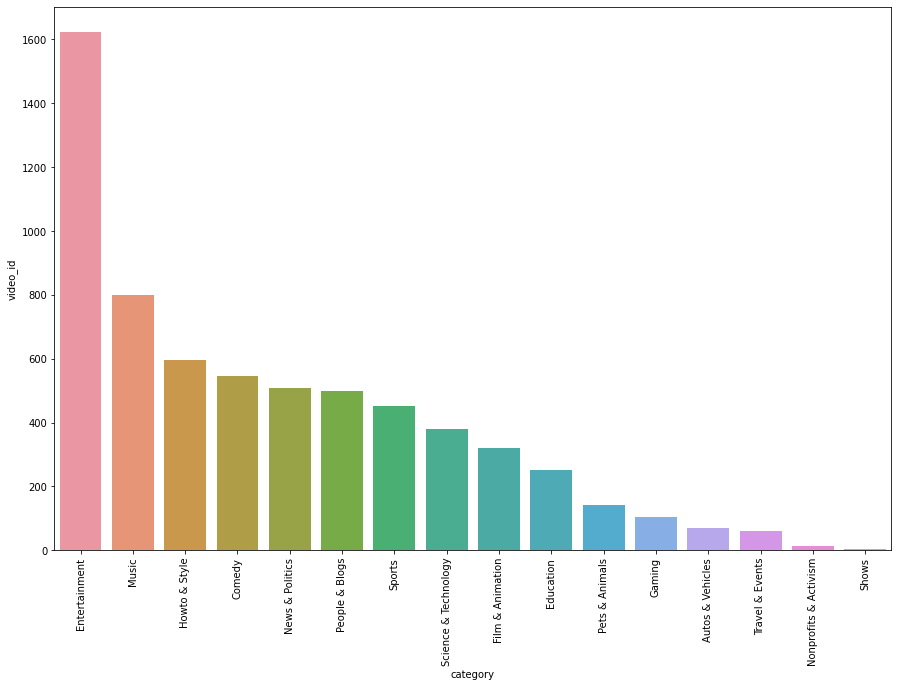

In [225]:
fig = plt.figure(figsize=(15,10))
sns.barplot('category', 'video_id', data=grouped)
plt.xticks(rotation=90)

## Project

Pick another country and compare the results with that of the US.

Instructions:
- Import the dataset
- Check for missing values
- Look at descriptive statistics
- Merge with categories
- Pivot to find which category has the highest videos uploaded